In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
df = pd.read_csv('/content/Netflix Userbase (1).csv')

In [7]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [8]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


In [9]:
df.duplicated().sum()

0

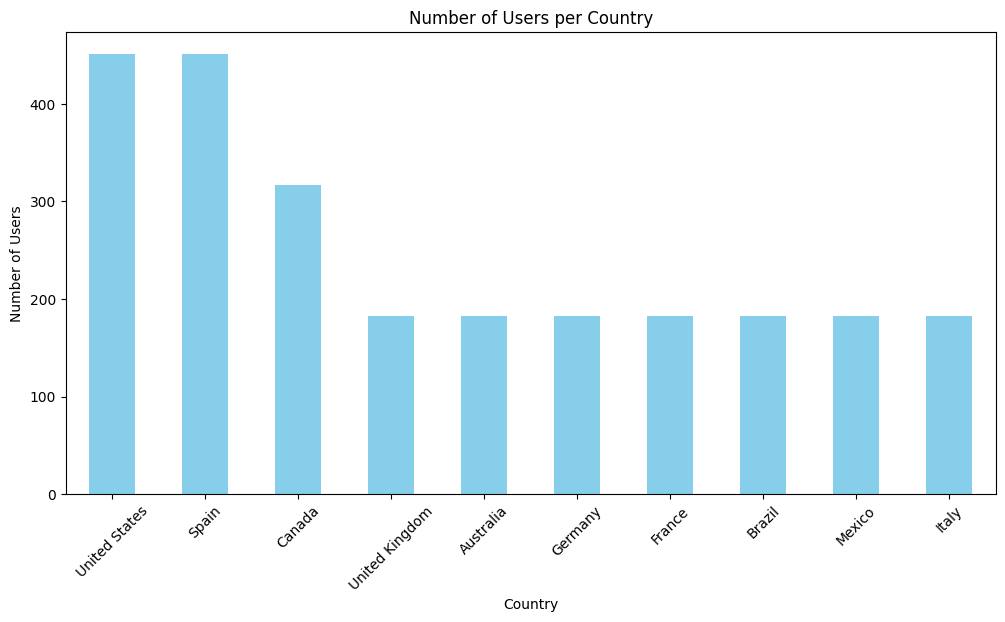

In [10]:
plt.figure(figsize=(12,6))

df['Country'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Number of Users per Country')

plt.xlabel('Country')

plt.ylabel('Number of Users')

plt.xticks(rotation=45)

plt.show()

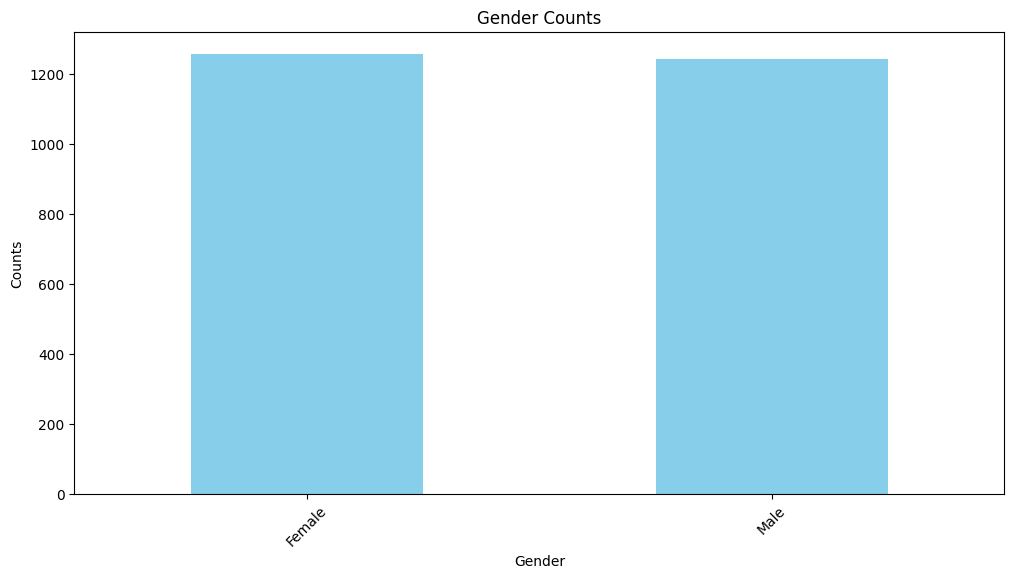

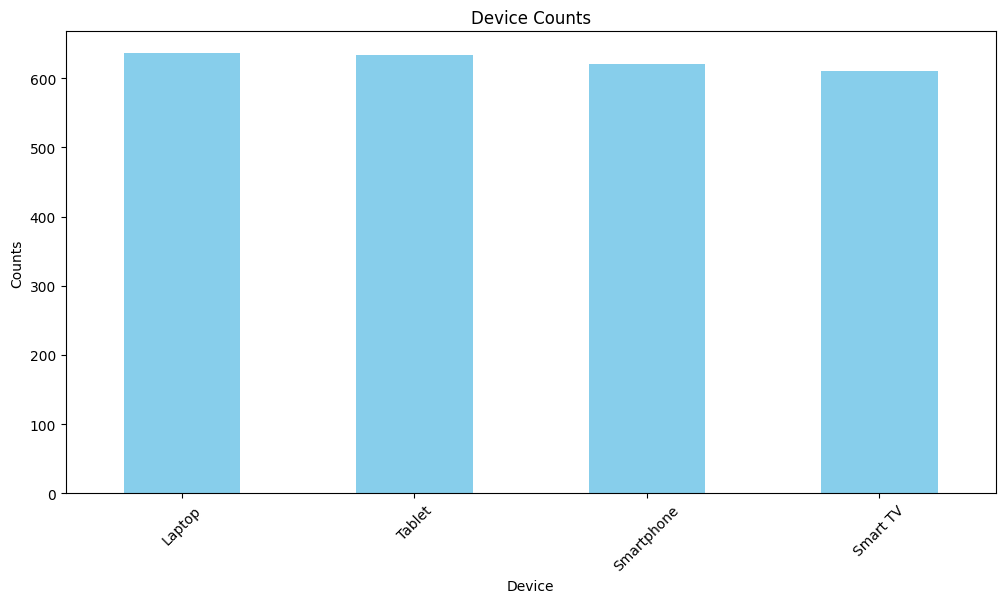

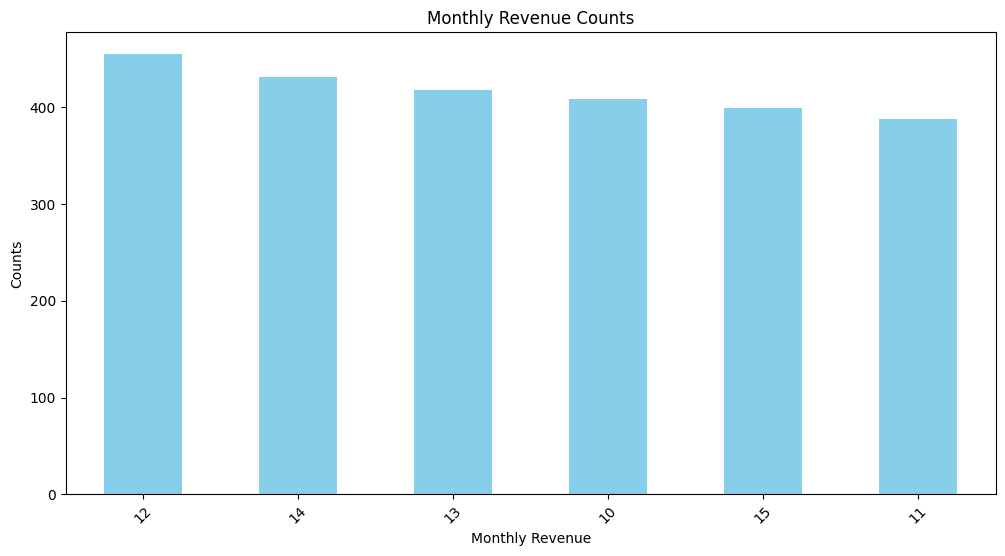

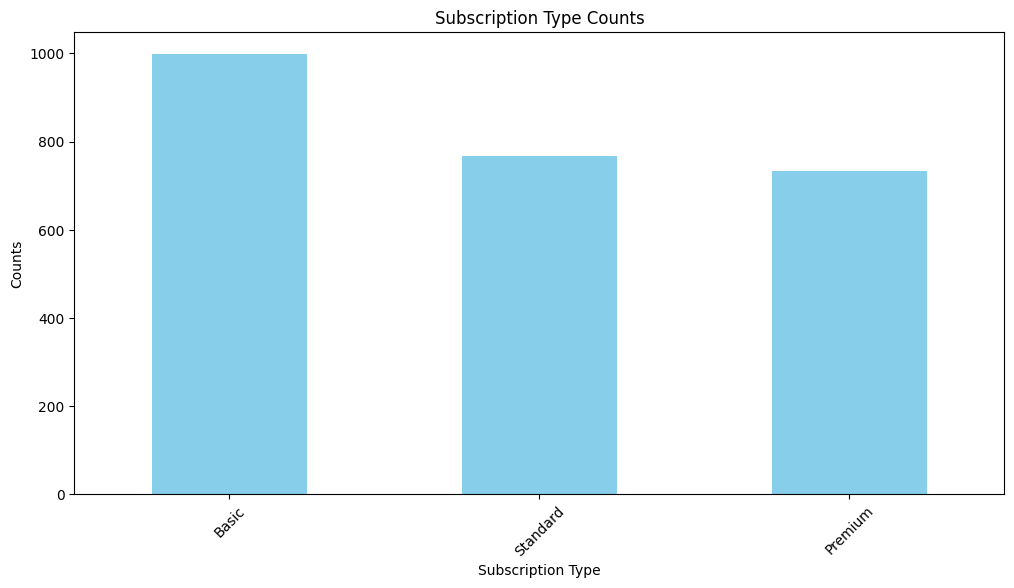

In [11]:
columns_titles = {
    'Gender' : 'Gender Counts',
    'Device' : 'Device Counts',
    'Monthly Revenue' : 'Monthly Revenue Counts',
    'Subscription Type' : 'Subscription Type Counts'
}
for column, title in columns_titles.items():
  plt.figure(figsize=(12,6))
  df[column].value_counts().plot(kind='bar', color='skyblue')
  plt.title(title)
  plt.xlabel(column)
  plt.ylabel('Counts')
  plt.xticks(rotation=45)
  plt.show()

In [12]:
user_counts = df['Country'].value_counts().reset_index()
user_counts_by_country = user_counts.rename(columns={'index': 'Country', 'Country': 'User Count'})
user_counts_by_country

,User Count,count
0,United States,451
1,Spain,451
2,Canada,317
3,United Kingdom,183
4,Australia,183
5,Germany,183
6,France,183
7,Brazil,183
8,Mexico,183
9,Italy,183


In [13]:
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']
import plotly.express as px

In [20]:
fig = px.choropleth(user_counts_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='User Count',
                    hover_name='Country',
                    title='User Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma) # Corrected the keyword argument name
fig.update_layout(
    width=1000,
    height=700,
    title_font_size=24,
    geo=dict(showframe=False, showcoastlines=False)
)

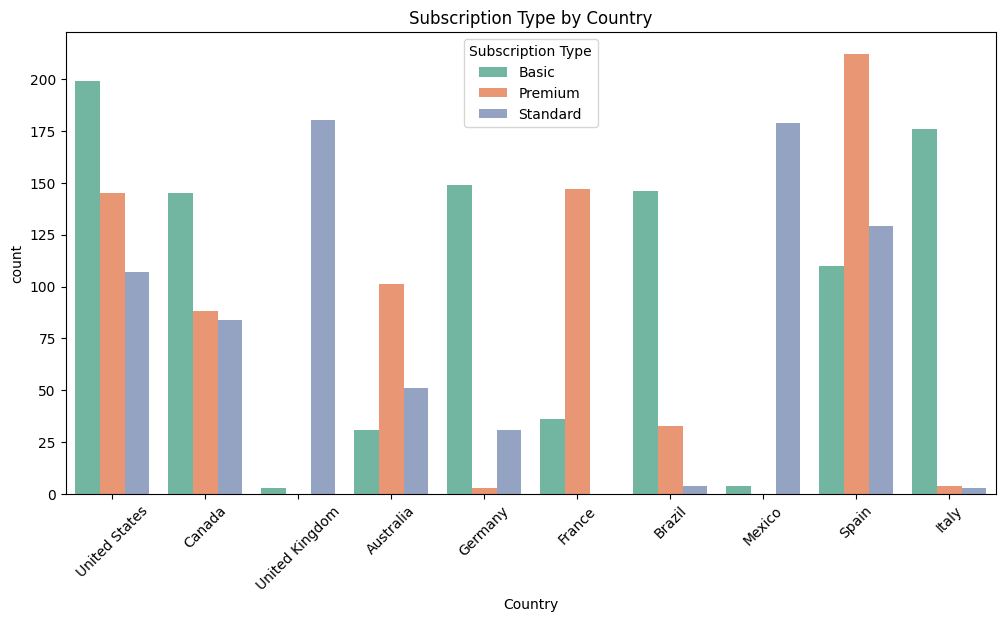

In [21]:
plt.figure(figsize=(12,6))

sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2')

plt.title('Subscription Type by Country')

plt.xticks (rotation=45)

plt.show()

In [25]:
subs_by_country = df.pivot_table(index='Country', columns ='Subscription Type', values='User ID', aggfunc='count', fill_value=0)




In [26]:
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [27]:
subs_by_country['Total'] = subs_by_country.sum(axis=1)

In [28]:
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


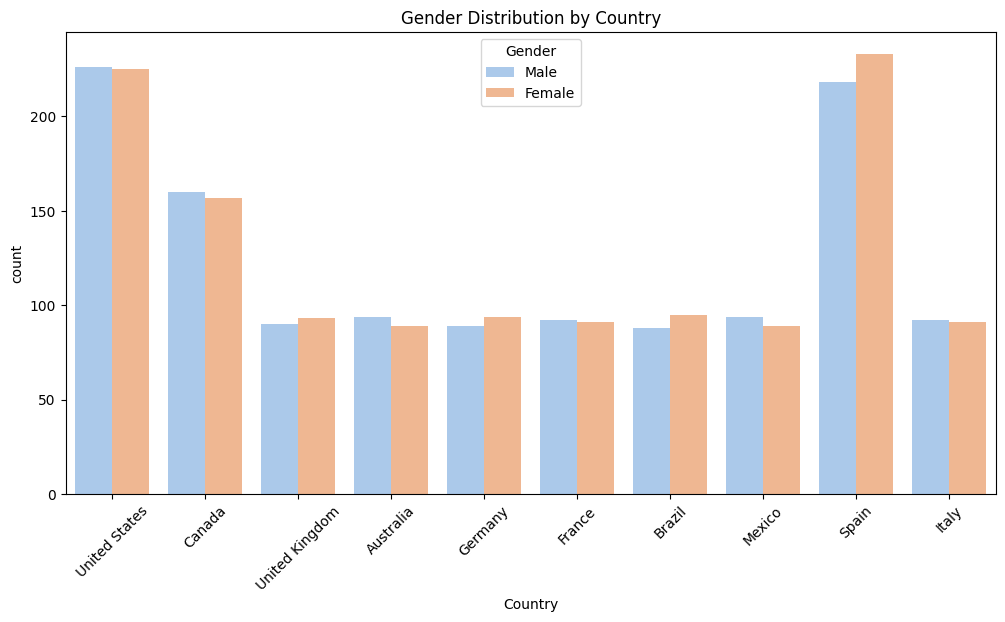

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [30]:
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)

In [31]:
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [32]:
subs_by_country_gender = df.pivot_table(index='Country', columns=['Subscription Type', 'Gender'], values='User ID', aggfunc='count', fill_value=0)

In [34]:
subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [38]:
subs_by_country_gender2 = df.pivot_table(index=['Country', 'Gender'], columns='Subscription Type', values='User ID', aggfunc='count', fill_value=0)

In [39]:
subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

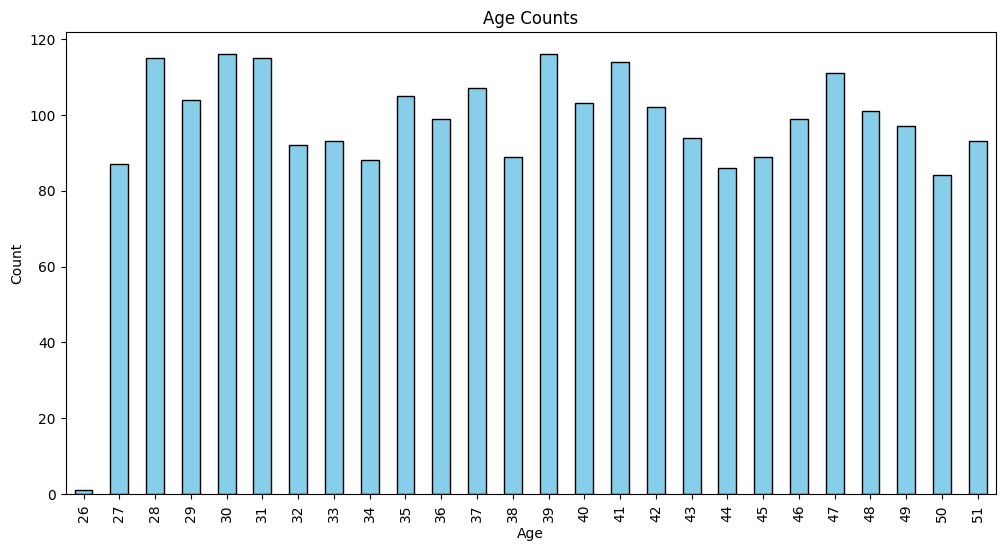

In [45]:
plt.figure(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='Black')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [54]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2


In [49]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [52]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [53]:
df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x/30))

In [57]:
average_duration = df['Duration Months'].mean()

In [58]:
print(f"Average Duration: {average_duration}")

Average Duration: 10.7808


In [59]:
df['LTV'] = df['Monthly Revenue'] * df['Duration Months']

In [60]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


<function matplotlib.pyplot.show(close=None, block=None)>

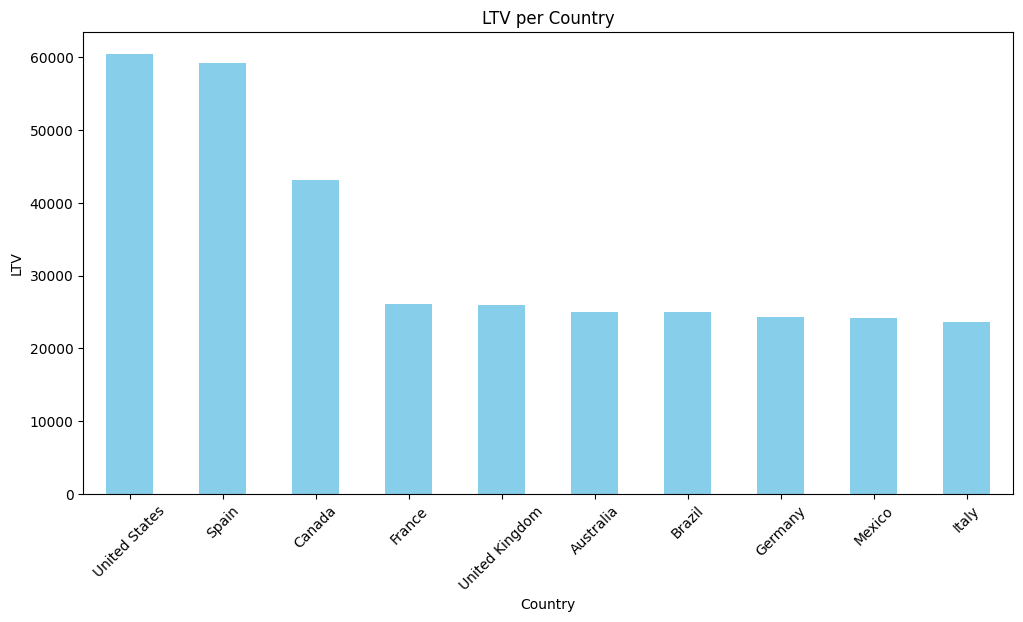

In [61]:
ltv_per_country_sum = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('LTV')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

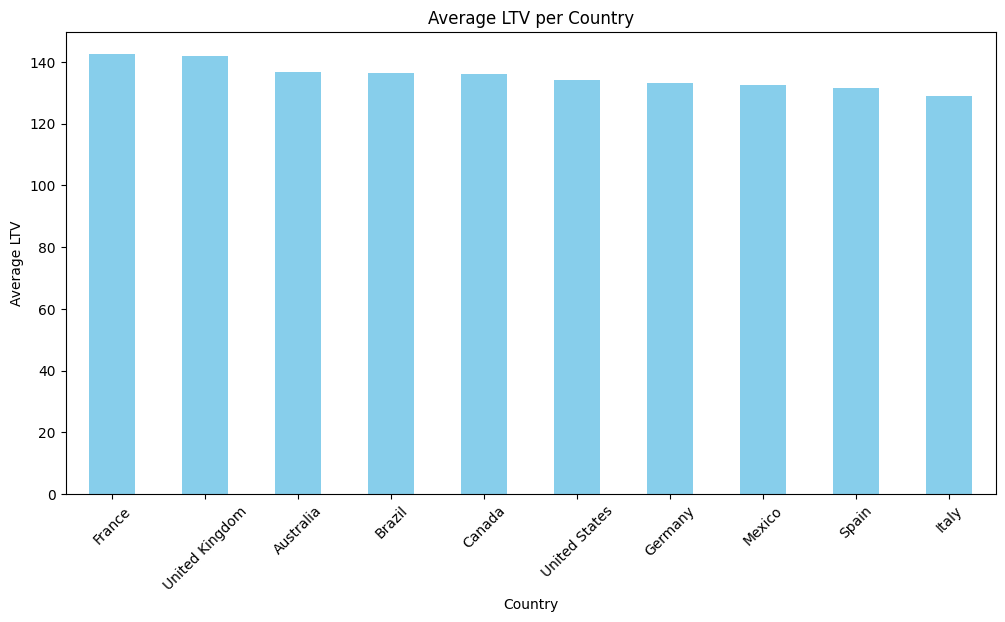

In [66]:
ltv_per_country = df.groupby('Country')['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ltv_per_country.plot(kind='bar', color='skyblue')
plt.title('Average LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show

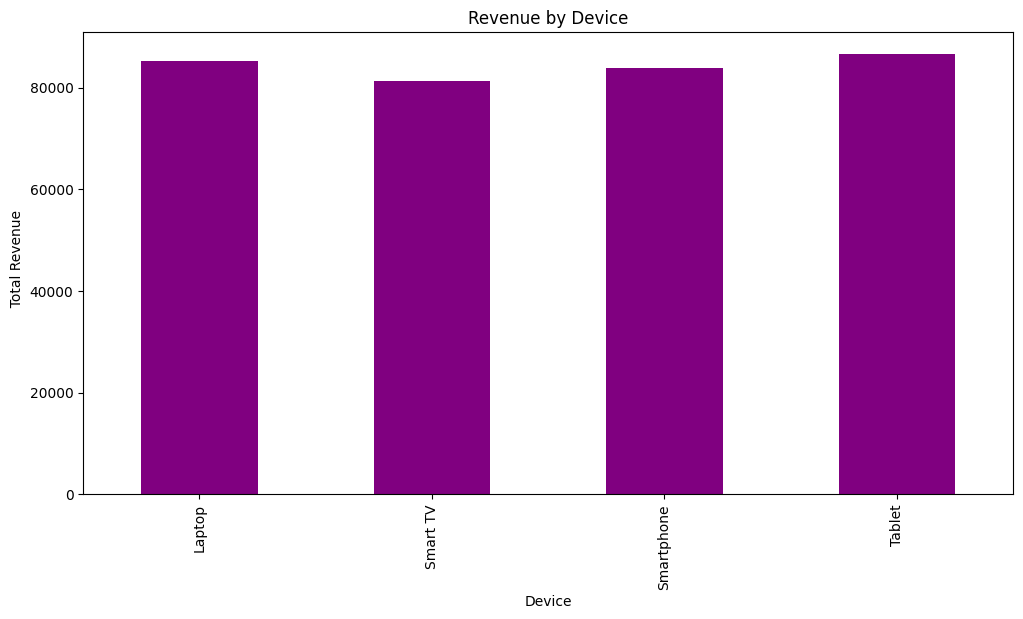

In [67]:
revenue_by_device = df.groupby('Device')['LTV'].sum()

plt.figure(figsize=(12,6))
revenue_by_device.plot(kind='bar', color='purple')
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('  Total Revenue')
plt.show()

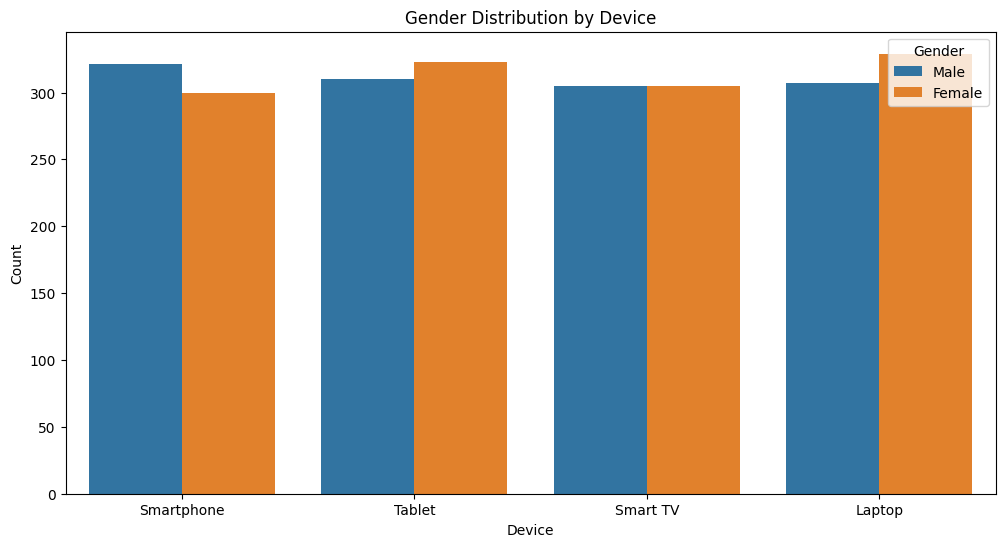

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x='Device', hue='Gender', data=df)
plt.title('Gender Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()